# Handin exercise for week 5: Pandas

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

## Status
Opg 5A, 5B, 5C complete

## Solution part 1

In [1]:
import pandas as pd
import math

In [2]:
#csv fra fil:
file ='../data/Fa.csv'
fa = pd.read_csv(file,sep=';')


In [3]:
# 5 A
url = ('https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&Tid=*&CIVILSTAND=F')
data = pd.read_csv(url,sep=';')


In [4]:
year2008 = data.iloc[0][2]
year2020 = data.iloc[-2][2]
print(round((year2020/year2008-1)*100,2),"%")

28.81 %


In [5]:
# 5 B
url = ('https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&OMR%C3%85DE=*&Tid=2020K4&CIVILSTAND=TOT%2CU')
data = pd.read_csv(url,sep=';')
big_cities = ['København','Odense','Aalborg','Aarhus','Esbjerg']
never_maried = pd.DataFrame(columns = ["OMRÅDE","ANDEL"])

big5 = data[data['OMRÅDE'].isin(big_cities)].sort_values(by='INDHOLD',ascending=False)

mask_all_status = big5[:]['CIVILSTAND'] == 'I alt'
mask_unmarried_status = big5[:]['CIVILSTAND'] == 'Ugift'
for x in range (len(big_cities)):
    total = big5[mask_all_status].iloc[x,3]
    ugifte = big5[mask_unmarried_status].iloc[x,3]
    never_maried.loc[x] = [big5[mask_all_status].iloc[x,0]] + [ugifte/total]

never_maried = never_maried.sort_values(by='ANDEL',ascending=False)
print("Byen med højeste andel af ugifte er:",never_maried.iloc[0,0])

Byen med højeste andel af ugifte er: København


In [ ]:
# 5 C

url = ('https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&OMR%C3%85DE=101&CIVILSTAND=F%2CE%2CG%2CU&Tid=2008K1%2C2021K1')
data = pd.read_csv(url,sep=';')

mask1 = data[:]['TID'] == '2008K1'
mask2 = data[:]['TID'] == '2021K1'

data_chart = pd.DataFrame({'2008' : data[mask1].iloc[:,3],
                           '2021' : data[mask2].iloc[:,3]},
                           index = data[mask1]['CIVILSTAND'])
#bar_chart = data_chart.plot.bar(rot=0)
print(data)
print("")
print(data[mask1].iloc[:,3])
print("")
print(data_chart)

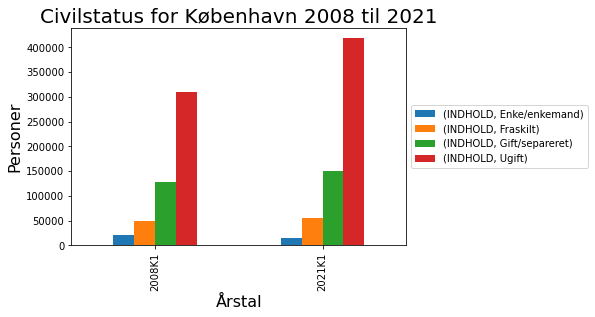

In [35]:
# 5 C TESTER

url = ('https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&OMR%C3%85DE=101&CIVILSTAND=F%2CE%2CG%2CU&Tid=2008K1%2C2021K1')
data = pd.read_csv(url,sep=';')

df = data.groupby(['TID','CIVILSTAND']).mean().unstack()
dfx = data.groupby(['TID','CIVILSTAND']).mean()


graf = df.plot(kind = 'bar')
graf.set_title("Civilstatus for København 2008 til 2021", fontsize=20)
graf.set_ylabel("Personer", fontsize=16)
graf.set_xlabel("Årstal", fontsize=16)
graf.legend(loc='center left', bbox_to_anchor = (1, 0.5))

In [47]:
url = ('https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&OMR%C3%85DE=000&K%C3%98N=TOT&ALDER=IALT&CIVILSTAND=U%2CG')
url = ('https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&OMR%C3%85DE=000&K%C3%98N=TOT&ALDER=IALT&CIVILSTAND=U%2CG&Tid=2020K4')
data = pd.read_csv(url,sep=';')
data_gift = data[data['CIVILSTAND']=='Gift/separeret']
data_ugift = data[data['CIVILSTAND']=='Ugift']
data_ugift


,OMRÅDE,KØN,ALDER,CIVILSTAND,TID,INDHOLD
0,Hele landet,I alt,I alt,Ugift,2020K4,2859116


## ALT HEREFTER ER KLADDE

In [7]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
indexo = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=indexo)
df
#ax = df.plot.bar(rot=0)

,speed,lifespan
snail,0.1,2.0
pig,17.5,8.0
elephant,40.0,70.0
rabbit,48.0,1.5
giraffe,52.0,25.0
coyote,69.0,12.0
horse,88.0,28.0


In [ ]:
#print(data['CIVILSTAND'])
print("")
#print(data[mask1].iloc[:,3])
print("")
#print(data[mask2])
print("")